## khai báo thư viện

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Nạp dữ liệu

In [2]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

# **Xử lý dữ liệu**

In [3]:
train_test_data = [df,df_test]

for ds in train_test_data:
    ds['Title'] = ds['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [4]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [5]:
mapping_title = {"Mr":0,"Miss":1,"Mrs":2,
                 "Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,
                 "Ms":3,"Mme":3,"Don":3,"Lady":3,"Sir":3,"Dona" : 3, "Capt":3,"Countess":3,"Jonkheer":3}

for ds in train_test_data:
    ds['Title'] = ds["Title"].map(mapping_title)


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


**Xóa các cột dữ liệu không cần thiết**

In [7]:
df.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


In [9]:
mapping_gender = {"male":0,"female":1}
for ds in train_test_data:
    ds['Sex'] = ds['Sex'].map(mapping_gender)

**fill NaN cho biến Age dựa vào danh xưng của tên**

In [10]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
df_test['Age'] = df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'))

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


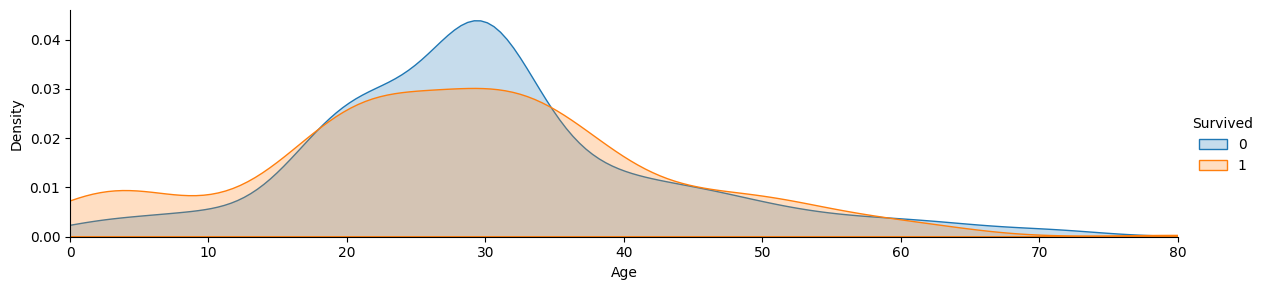

In [12]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()

Phần lớn hành khách trên tàu Titanic thuộc nhóm tuổi từ 20 đến 30. Và điều này nghe có hơi mẫu thuẫn, nhưng cũng ở độ tuổi này cũng có tỷ lệ tử vong cao VÀ tỷ lệ sống sót cao.

**Chia tuổi thành các nhóm tuổi** (vì giá trị tuổi hiện tại là biến liên tục có giá trị khác nhau. Khi trực quan hóa, việc đếm số lượng hành khách ở từng tuổi thường không hiệu quả.)

Vì vậy ta sẽ chia thành các nhóm tuổi như sau:

- trẻ em (0) : Age <= 16

- người trẻ (1) : Age = 16-26

- người lớn (2) : 26-36

- trung niên (3) : 36-62

- cao tuổi (4) : Age > 62

In [13]:
for dataset in train_test_data:
    #Trẻ em (0) : Age <= 16
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 
    
    #Người trẻ (1) : 16 < Age <= 26
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    
    #Người lớn (2) : 26 < Age <= 36
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    
    #Trung niên (3) : 36 < Age <= 62
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    
    #Cao tuổi (4) : Age > 62
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [14]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


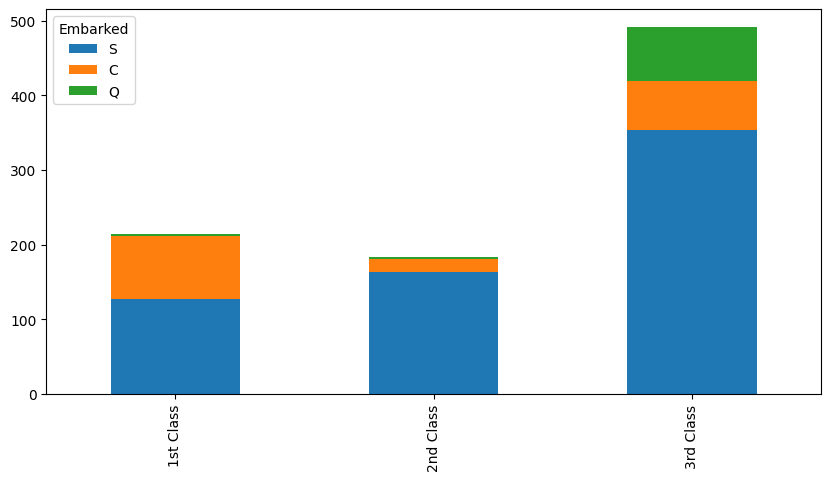

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [15]:
Pclass1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass'] == 3]['Embarked'].value_counts()
temp = pd.DataFrame([Pclass1,Pclass2,Pclass3])
temp.index = ['1st Class','2nd Class','3rd Class']
temp.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

**Hơn 50% hành khách của mỗi hạng vé (1st, 2nd, 3rd) đều lên tàu từ cảng S (Southampton).** Vì vậy các giá trị NaN của embarked sẽ thay bằng S

In [16]:
for ds in train_test_data:
    ds['Embarked'] = ds['Embarked'].fillna('S')

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**Chuyển các giá trị Embarked từ object về float**

In [19]:
mapping_Embarked = {'S':0,'C':1,'Q':2}
for ds in train_test_data:
    ds['Embarked'] = ds['Embarked'].map(mapping_Embarked)

In [20]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


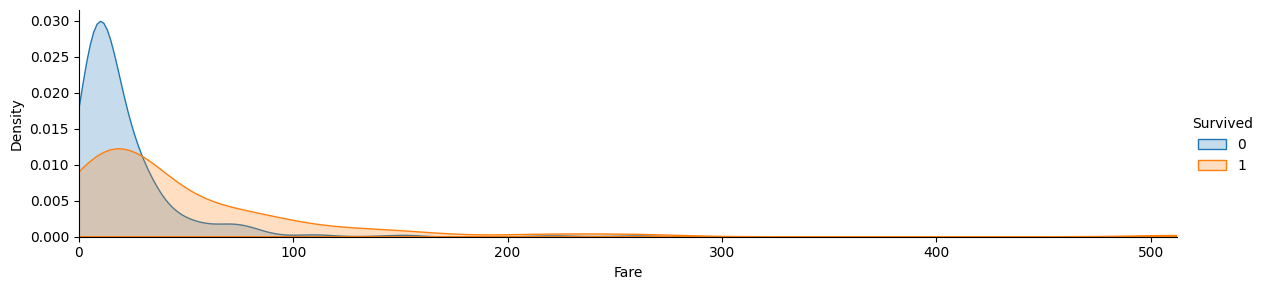

In [21]:
facet = sns.FacetGrid(df,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim = (0, df['Fare'].max()))
facet.add_legend()
plt.show()

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

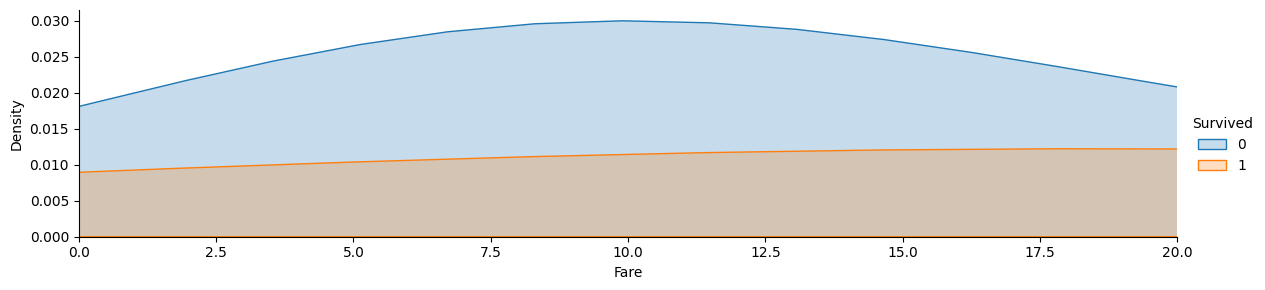

In [22]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(17.0, 30.0)

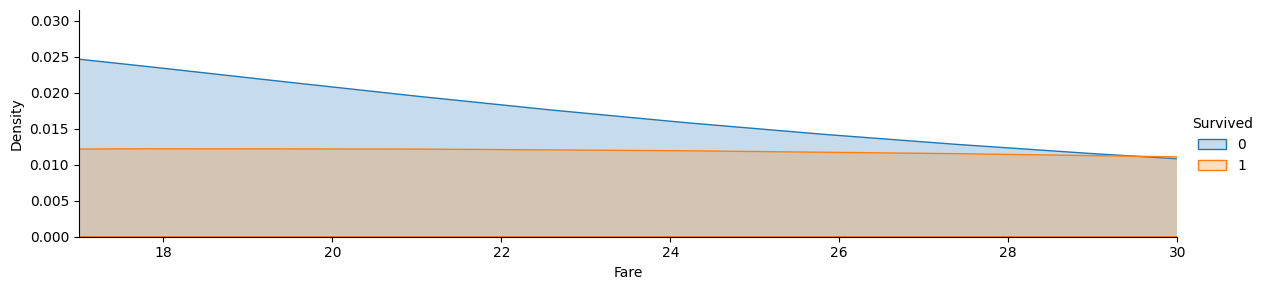

In [23]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(17, 30)

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 100.0)

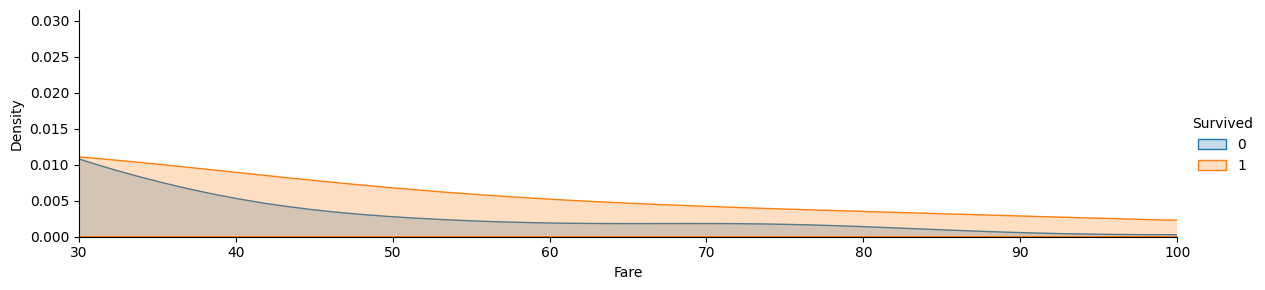

In [24]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)

Các biểu đồ xác nhận rằng giá vé càng **cao** thì khả năng **sống sót** càng lớn.

**Cũng giống như biến Age ta sẽ chuyển giá trị liên tục của fare thành các nhóm giá vé khác nhau**

- 0: dưới 17 giá trị tiền

- 1: 17-30 giá trị tiền

- 2: 30-100 giá trị tiền

- 3: hơn 100 giá trị tiền 

In [25]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [26]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [27]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

C:\Users\Keqing\AppData\Local\Temp\ipykernel_4572\4235964581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\Keqing\AppData\Local\Temp\ipykernel_4572\4235964581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

**Vì giá trị cabin thiếu quá nhiều cho nên cũng sẽ drop đi**

In [28]:
df.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

**Gộp biến SibSp và Parch** vì có liên quan đến nhau. Gộp theo công thức sau:

**FamilySize** = Sibsp + Parch + 1 (Cộng 1 là vì cộng chính hành khách đó)

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [30]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,0,0,1
5,6,0,3,0,2.0,0,0,330877,0.0,2,0,1
6,7,0,1,0,3.0,0,0,17463,2.0,0,0,1
7,8,0,3,0,0.0,3,1,349909,1.0,0,3,5
8,9,1,3,1,2.0,0,2,347742,0.0,0,2,3
9,10,1,2,1,0.0,1,0,237736,2.0,1,2,2


(0.0, 11.0)

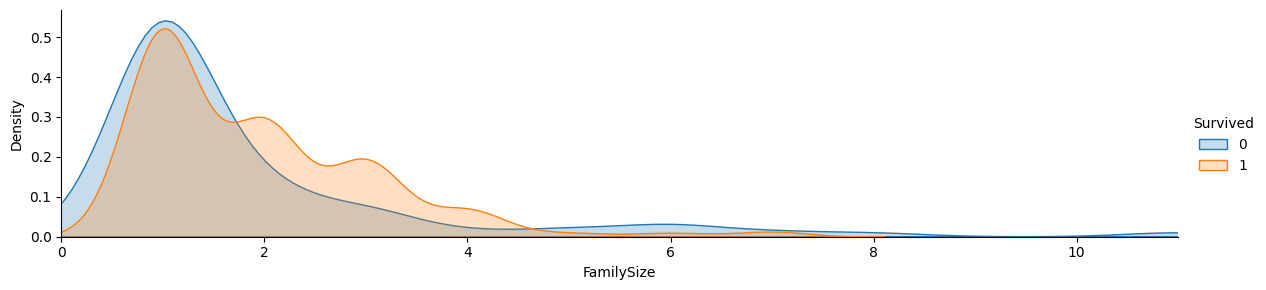

In [31]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill=True)
facet.set(xlim=(0, df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

Biểu đồ này là một bằng chứng rõ ràng cho thấy trong thảm họa Titanic, việc đi cùng gia đình vừa phải (2 đến 4 người) là yếu tố sống sót cao nhất. Biến FamilySize là một đặc trưng dự đoán mạnh mẽ cho mô hình.

In [32]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [33]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2,0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,0,3,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1,2,0.4


In [34]:
features_drop = ['Ticket','SibSp','Parch']
train = df.drop(features_drop,axis=1)
test = df_test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

*Có 177 giá trị NaN trong Age và 687 giá trị NaN trong Cabin*

In [35]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 7), (891,))

In [36]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,0.4
1,1,1,1,3.0,2.0,1,2,0.4
2,1,3,1,1.0,0.0,0,1,0.0
3,1,1,1,2.0,2.0,0,2,0.4
4,0,3,0,2.0,0.0,0,0,0.0
5,0,3,0,2.0,0.0,2,0,0.0
6,0,1,0,3.0,2.0,0,0,0.0
7,0,3,0,0.0,1.0,0,3,1.6
8,1,3,1,2.0,0.0,0,2,0.8
9,1,2,1,0.0,2.0,1,2,0.4


In [37]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2,0,0.0
1,893,3,1,3.0,0.0,0,2,0.4
2,894,2,0,3.0,0.0,2,0,0.0
3,895,3,0,2.0,0.0,0,0,0.0
4,896,3,1,1.0,0.0,0,2,0.8
5,897,3,0,0.0,0.0,0,0,0.0
6,898,3,1,2.0,0.0,2,1,0.0
7,899,2,0,1.0,1.0,0,0,0.8
8,900,3,1,1.0,0.0,1,2,0.0
9,901,3,0,1.0,1.0,0,0,0.8


### Lưu lại vào exps

#### Tạo thư mục

In [38]:
exp_dir = "../exps"
if os.path.exists(exp_dir) == False:
    os.makedir(exp_dir,exist_ok=True)

save_dir = f"{exp_dir}/feature_Labels"
os.makedirs(save_dir,exist_ok=True)

#### Lưu dữ liệu Features

In [39]:
train.to_excel(f'{save_dir}/train_Labels.xlsx',index=False)
test.to_excel(f'{save_dir}/test_Labels.xlsx',index=False)